# Data Bootcamp Final Project: Twitter Sentiment Analysis 
<br><br> 
<b> Names: </b>
<br>Zeezee Canning (azc235)
<br>Daniel Garcia (dg3569)
<br>Chai Ratnakaram (ckr2012)

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
mpl.rcParams['agg.path.chunksize'] = 10000

In [168]:
dataUnfiltered = pd.read_csv("randomized_sample.csv", index_col = "Unnamed: 0")
dataUnfiltered = dataUnfiltered[["tweet_ID", "user_ID", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "valence_intensity", "anger_intensity", "fear_intensity", "sadness_intensity",
             "joy_intensity", "sentiment_category", "emotion_category", "keyword_used"]].convert_dtypes()
dataUnfiltered.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan


In [169]:
data = dataUnfiltered[dataUnfiltered["emotion_category"] != "no specific emotion"] # drop neutral emotions

### All records with Negative Valence Intensity

In [170]:
negative_valence = data[data["valence_intensity"] < 0.5]

In [171]:
negative_valence.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan


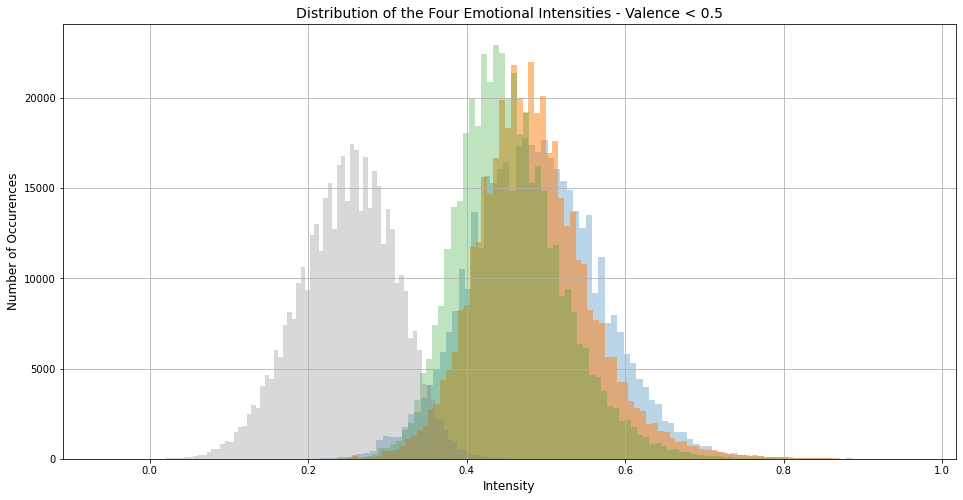

In [172]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence < 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
negative_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
plt.show()

### All records with Positive Valence Intensity

In [173]:
pos_valence = data[data["valence_intensity"] >= 0.5]

In [174]:
pos_valence.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
3131,1224697244378705925,2330878992,1,0,1,0,0,0,0,0,0,0,0.537,0.378,0.379,0.364,0.350,positive,joy,wuhan
2321,1224708876530061313,494732159,1,1,0,0,0,0,0,0,0,0,0.521,0.448,0.423,0.444,0.424,positive,joy,wuhan
4410,1224678668510924802,1202543449850798080,1,0,0,0,0,0,0,0,0,0,0.580,0.370,0.414,0.374,0.420,positive,joy,wuhan
8579,1224609172961910784,33879571,1,0,0,0,0,0,0,0,0,0,0.538,0.305,0.300,0.358,0.438,positive,joy,wuhan


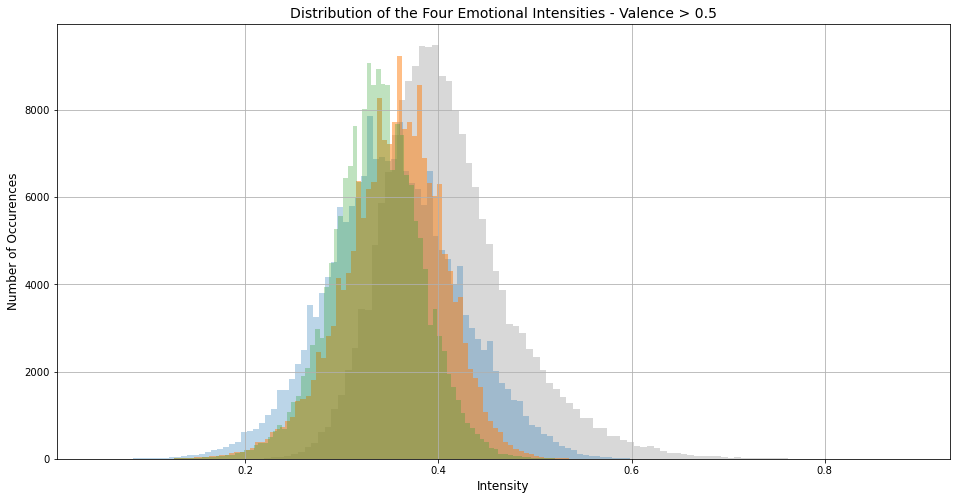

In [175]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence > 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
pos_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey") # grey
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3) # green
plt.show()

**Comparison between Positive and Negative Valence Intensities (Using Means)**

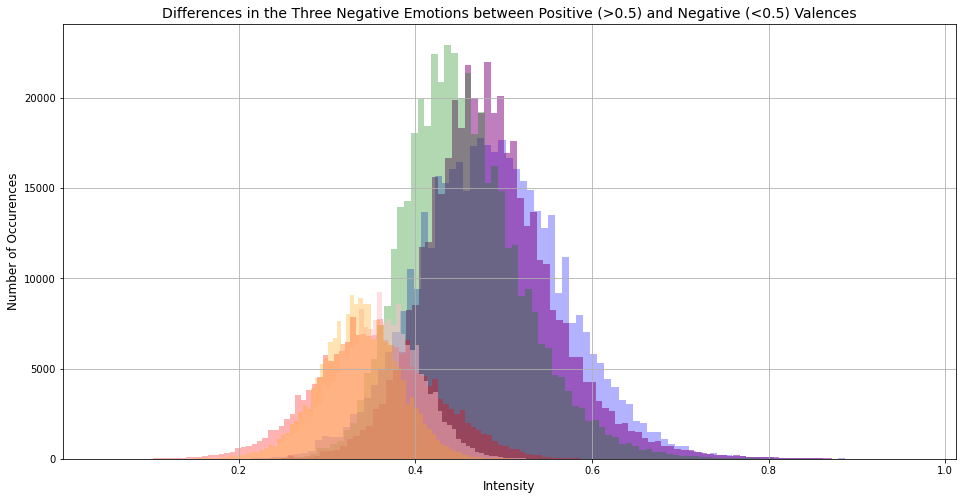

In [176]:
plt.figure(figsize = (16, 8))
plt.title("Differences in the Three Negative Emotions between Positive (>0.5) and Negative (<0.5) Valences", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "blue") # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "purple") # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "green") # green
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "red" ) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "pink" ) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "orange") # green

plt.show()

Negative Valence Intensity (i.e. Negative overall "mood") translates to a much greater intensity in all of the singular emotions. Likewise, Positive Valence Intensity (i.e. Positive "mood") does not seem to greatly affect the intensity of all the four emotions.

In [177]:
twitter_sentiment = pd.read_csv('randomized_sample.csv')

In [178]:
rolling_mean_valence = twitter_sentiment.valence_intensity.rolling(window=10000).mean()

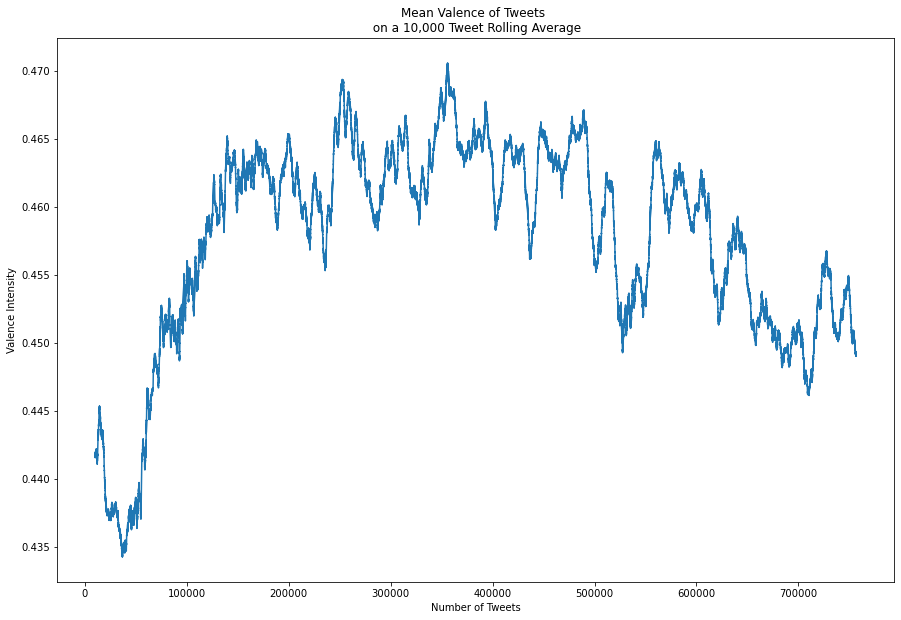

In [179]:
fig, ax = plt.subplots(figsize=(15,10))

y = rolling_mean_valence

ax.plot(y,label='Valence')
ax.set(title='Mean Valence of Tweets \n on a 10,000 Tweet Rolling Average',ylabel='Valence Intensity',xlabel='Number of Tweets')


plt.show()

For analysis: Elaborate on the overall trend and how the endpoint is greater (more positive) than the start point

In [180]:
quantified_sentiment_category = []
for i in twitter_sentiment['sentiment_category']:
    if i == 'very negative':
        quantified_sentiment_category.append(-2)
    elif i == 'very positive':
        quantified_sentiment_category.append(2)
    elif i == 'negative':
        quantified_sentiment_category.append(-1)
    elif i == 'positive':
        quantified_sentiment_category.append(1)
    elif i == 'neutral':
        quantified_sentiment_category.append(0)
#This quantifies the column of sentiment category; it turns a categorical variable into a quantitative one 

In [181]:
quantified_sentiment_category = pd.DataFrame(quantified_sentiment_category)
quantified_sentiment_category.rename(columns={0:'sentiment_category_quantified'},inplace=True)
quantified_sentiment_category.head()

,sentiment_category_quantified
0,-1
1,-2
2,-1
3,-1
4,-1


In [182]:
twitter_sentiment = twitter_sentiment.merge(quantified_sentiment_category,how='left',left_index=True,right_index=True)
twitter_sentiment.head()

,Unnamed: 0,tweet_ID,t1,t2,t3,t4,t5,t6,t7,t8,...,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used,user_ID,sentiment_category_quantified
0,8183,1224615942803664896,1,1,0,0,0,0,0,0,...,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan,223101960,-1
1,1538,1224720188752433154,1,0,1,0,0,0,0,0,...,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan,17818643,-2
2,8497,1224610619384528896,1,0,0,0,0,0,0,0,...,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan,19383099,-1
3,2398,1224707720995069952,1,1,0,0,0,0,0,0,...,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan,43381817,-1
4,9313,1224596331315986433,1,0,0,1,0,0,0,0,...,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan,3002161959,-1


In [183]:
dummy_emotion = pd.get_dummies(twitter_sentiment['emotion_category'])
dummy_emotion.head()

,anger,fear,joy,no specific emotion,sadness
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [184]:
dummy_emotion = dummy_emotion.merge(twitter_sentiment['sentiment_category_quantified'],how='left',left_index=True,right_index=True)
dummy_emotion.columns = dummy_emotion.columns.str.replace(' ','_')
dummy_emotion.head()

,anger,fear,joy,no_specific_emotion,sadness,sentiment_category_quantified
0,0,1,0,0,0,-1
1,0,1,0,0,0,-2
2,0,1,0,0,0,-1
3,0,1,0,0,0,-1
4,0,1,0,0,0,-1


In [185]:
reg_emotion = smf.ols('sentiment_category_quantified ~ fear+anger+joy+sadness',dummy_emotion).fit()
print(reg_emotion.summary())

                                  OLS Regression Results                                 
Dep. Variable:     sentiment_category_quantified   R-squared:                       0.947
Model:                                       OLS   Adj. R-squared:                  0.947
Method:                            Least Squares   F-statistic:                 3.353e+06
Date:                           Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                                   17:03:13   Log-Likelihood:                 97698.
No. Observations:                         756400   AIC:                        -1.954e+05
Df Residuals:                             756395   BIC:                        -1.953e+05
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

This model on the other, appears to have tremendous predictive power when it relates the quantified column of sentiment category to specific emotions. <br><br> If we're going to run through this taking all necessary statistical steps we first have to conduct a test of hypothesis where H0: β1=β2=β3=β4=0 (where βi is the slope of a given xi variable). If the null hypothesis is true, this means that no β has a relationship with our value of y. <br><br>Our alternative hypothesis is as follows, Ha: β1=β2=β3=β4≠0. If the alternative hypothesis is true, this means that at least one β has a relationship with y. <br><br> To confirm which hypothesis is correct we look to "Prob (F-statistic)" in our OLS Regression Results, since our p-value is smaller than any reasonable α (.05 or .01) we can reject the null hypothesis, concluding that there's statistically significant evidence in favor of at least one β having a relationship with y <br><br> We can now look at the model's predictive ability, which for multiple regression is defined by the Adjusted R-squared (since this metric takes into account the amount of independent variables the model is using) to conclude that approximately 94.7% of the variation in y can be explained away by variation in our independent variables. <br><br> We can further decompose our model by independent variable as follows: <br><p style="text-indent: 40px">β1: The average quantified value of sentiment category is -1.0473 when fear is present, holding all other variables constant</p><br><p style="text-indent: 40px">β2: The average quantified value of sentiment category is -1.0840 when anger is present, holding all other variables constant</p><br><p style="text-indent: 40px">β3: The average quantified value of sentiment category is 1.0265 when joy is present, holding all other variables constant</p><br><p style="text-indent: 40px">β4: The average quantified value of sentiment category is -1.1349 when sadness is present, holding all other variables constant</p><br>Unsurprisingly, joy contributes positive emotion. What's more interesting however, is to look at which negative emotion contributes the most to the quantified value of sentiment category, which our model suggests is sadness since the average value of that is closer to -2 (the most extreme value of negative emotion) than any other emotion. From there, it appears to be that anger contributes more towards negative emotion than fear since |β1|>|β2|

In [186]:
valence_category = twitter_sentiment.groupby('emotion_category').agg({'valence_intensity':'mean','sentiment_category_quantified':'mean'}
                                                 ).reset_index().drop([2,3])
frequency = pd.DataFrame(twitter_sentiment['emotion_category'].value_counts()).reset_index().drop([2,3])
frequency


,index,emotion_category
0,anger,205483
1,fear,197249
4,sadness,39415


In [188]:
valence_category

,emotion_category,valence_intensity,sentiment_category_quantified
0,anger,0.394533,-1.084017
1,fear,0.402245,-1.047280
4,sadness,0.386021,-1.134898


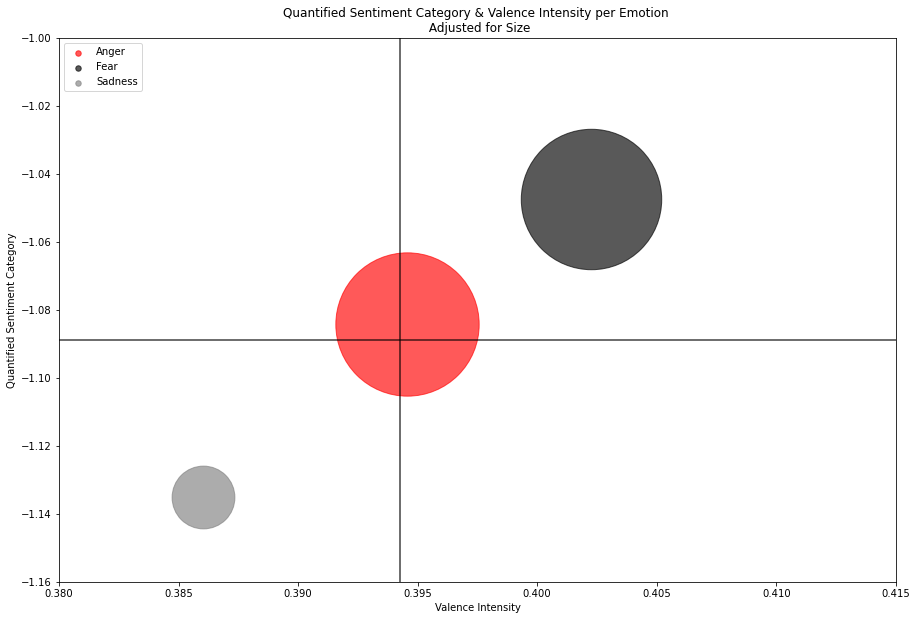

In [254]:
fig, ax = plt.subplots(figsize=(15,10))

x = valence_category['valence_intensity'].iloc[0]
y = valence_category['sentiment_category_quantified'].iloc[0]
x2 = valence_category['valence_intensity'].iloc[1]
y2= valence_category['sentiment_category_quantified'].iloc[1]
x3 = valence_category['valence_intensity'].iloc[2]
y3= valence_category['sentiment_category_quantified'].iloc[2]

ax.scatter(x,y,s=frequency['emotion_category'].iloc[0]/10,alpha=.65,label='Anger',color='r')
ax.scatter(x2,y2,s=frequency['emotion_category'].iloc[1]/10,alpha=.65,label='Fear',color='black')
ax.scatter(x3,y3,s=frequency['emotion_category'].iloc[2]/10,alpha=.65,label='Sadness',color='grey')

ax.set(xlim=(.38,.415),ylim=(-1.16,-1))
ax.legend()
ax.set(title='Quantified Sentiment Category & Valence Intensity per Emotion \n Adjusted for Size',xlabel='Valence Intensity',ylabel='Quantified Sentiment Category')
ax.axvline(x=valence_category['valence_intensity'].mean(),c='black',alpha=.75)
ax.axhline(y=valence_category['sentiment_category_quantified'].mean(),c='black',alpha=.75)


lgnd = plt.legend(loc="upper left", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

In [44]:
from kmodes.kmodes import KModes

In [48]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(topics)

print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3732, cost: 427437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 125641, cost: 518204.0
Run 2, iteration: 2/100, moves: 79412, cost: 518204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 183023, cost: 484159.0
Run 3, iteration: 2/100, moves: 25459, cost: 484159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 301884, cost: 803538.0
Run 4, iteration: 2/100, moves: 127417, cost: 803538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 130265, cost: 847085.0
Best run was number 1
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0]]


In [54]:
clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = topics.columns
clusterCentroidsDf

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,1,1,0,0,0,0,0,0,0,0


In [ ]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(topics)

print(km.cluster_centroids_)

clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = topics.columns
clusterCentroidsDf